# Trabajo Semanal 7

Alumno: Francisco Manoukian

## Ejercicio 1

<img src="./consigna_ts7_1.png" width="50%" align="left">

### Cálculo Manual

<img src="ts7_1.png" width="75%" align="left">

### Simulación de parámetros Z con LTSpice

<img src="./spice_1_circ.png" width="30%" align="left">

#### $Z_{11}, Z_{22}$
<img width="80%" src="./spice_1_z11.png" align="left">
<img width="80%" src="./spice_1_z22.png" align="left">

#### $Z_{12}, Z_{21}$
<img width="80%" src="./spice_1_z12.png" align="left">
<img width="80%" src="./spice_1_z21.png" align="left">

#### Conclusiones

Se puede observar que para un rango de frecuencias $1 Hz < f < 1MHz $ el circuito se comporta según los cálculos, exhibiendo los cuatro parámetros el mismo valor en módulo (300 $\Omega$), los parámetros $Z_{11}$ y $Z_{22}$ fase = 0$^\circ$ y los parámetros $Z_{12}$ y $Z_{21}$ fase = 180$^\circ$

## Ejercicio 2

<img src="./consigna_ts7_2.png" width="50%" align="left">

### Cálculo de $V_o/V_i$ por cuadripolos (Utilizando matrices T)

<img src="ts7_2_1.png" width="75%" align="left">

### Cálculo de $V_o/V_i$ por MAI

<img src="./ts7_2_2.png" width="70%" align="left">

Se observa que ambos métodos de cálculo devuelven la misma transferencia, correspondiente al tipo pasabajos Butterworth de orden 3 y frecuencia de corte $w_c = 1 \frac{rad}{s} = \frac{1}{2\pi} Hz$

### Simulación de transferencia con LTSpice

<figure class="half" style="display:flex">
    <img style="width:25%;height:25%" src="spice_2_circ.png" align="left">
    <img style="width:75%" src="spice_2_transf.png">
</figure>

### Cálculo de impedancia de entrada por MAI

In [9]:
import sympy as sp
from pytc2.cuadripolos import calc_MAI_impedance_ij

s = sp.symbols('s', complex=True)
L1,C2,L3,G4 = sp.symbols("L_1,C_2,L_3,G_4",real=True,positive=True)


Y=sp.Matrix([
    [1/(s*L1),-1/(s*L1),0,0],
    [-1/(s*L1),1/s*(L1+L3)/(L1*L3)+s*C2,-1/(s*L3),-s*C2],
    [0,-1/(s*L3),1/(s*L3)+G4,-G4],
    [0,-s*C2,-G4,s*C2+G4]
    ])

Zin = calc_MAI_impedance_ij(Y,ii=0,jj=3,verbose=True)
Zin.subs([(L1,1.5),(C2,4/3),(L3,0.5),(G4,1)])

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

(1.0*s**3 + 2.0*s**2 + 2.0*s + 1)/(0.666666666666667*s**2 + 1.33333333333333*s + 1)

### Comparación de resultados con LTSpice

Text(0.5, 1.0, 'Impedancia de entrada')

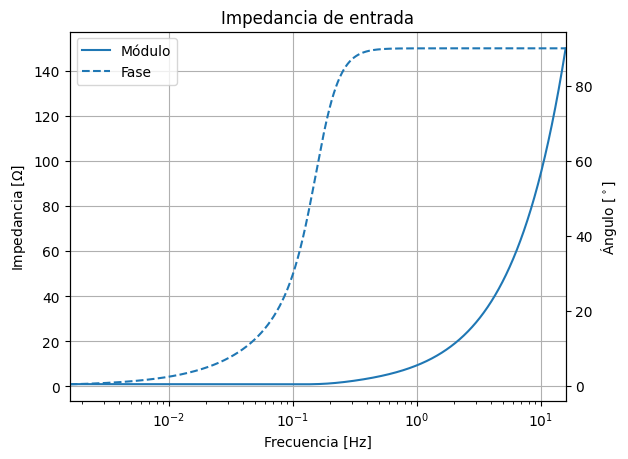

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as sig

num_z,den_z = sp.fraction(Zin.subs([(L1,1.5),(C2,4/3),(L3,0.5),(G4,1)]))
num_z = list(np.array(sp.Poly(num_z).all_coeffs(),dtype=float))
den_z = list(np.array(sp.Poly(den_z).all_coeffs(),dtype=float))

w,z = sig.freqs(num_z,den_z,worN=np.logspace(-2,2,num=10**5))

fig,ax1 = plt.subplots()
ax2 = ax1.twinx()

l1 = ax1.semilogx(w/(2*np.pi),np.abs(z),label='Módulo')
l2 = ax2.semilogx(w/(2*np.pi),np.angle(z,deg=True),linestyle='dashed',label='Fase')
ax1.set_ylabel('Impedancia [$\Omega$]')
ax2.set_ylabel('Ángulo [$^\circ$]')
ax1.set_xlabel('Frecuencia [Hz]')

plt.xlim([w[0]/(2*np.pi),w[-1]/(2*np.pi)])

l = [l.get_label() for l in l1+l2]
ax1.legend(l1+l2,l,loc='upper left')
ax1.grid()

plt.title("Impedancia de entrada")

<img src="./spice_2_zin.png" width="60%" align="left">